<ul>
<li>Hello everyone,Recently I participated in a machine learning competition on Hackerearth. https://www.hackerearth.com/challenge/hiring/data-science-hiring-challenge/ .</li>

<li>Data can be found here https://he-s3.s3.amazonaws.com/media/hackathon/data-science-hiring-challenge/funding-successful-projects-c40d55cb-92e5b384/a339bbf8fa8511e7.zip</li>
<li>In this challenge, you have to predict if a project will get successfully funded or not.</li>

<li>I am sharing this so that it helps others in starting with machine learning.</li>
</ul>

In [1]:
# Some basic imports
import pandas as pd
import numpy as np
%matplotlib inline

Columns and their descripition:
<table>
  <tr>
    <th>Variable</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>name</td>
    <td>name of the project</td> 
  </tr>
    <tr>
    <td>desc</td>
    <td>description of project</td> 
  </tr>
    <tr>
    <td>goal</td>
    <td>the goal (amount) required for the project</td> 
  </tr>
    <tr>
    <td>keywords</td>
    <td>keywords which describe project</td> 
  </tr>
    <tr>
    <td>disable communication</td>
    <td>whether the project authors has disabled communication option with people donating to the project</td> 
  </tr>
      <tr>
    <td>country</td>
    <td>country of project author</td> 
  </tr>
        <tr>
    <td>currency</td>
    <td>currency in which goal (amount) is required</td> 
  </tr>
  
    <tr>
    <td>deadline</td>
    <td>till this date the goal must be achieved (in unix timeformat)</td> 
  </tr>
    <tr>
    <td> state_changed_at</td>
    <td>at this time the project status changed. Status could be successful, failed, suspended,                            cancelled etc. (in unix timeformat)</td> 
  </tr>  <tr>
    <td>created_at</td>
    <td>at this time the project was posted on the website(in unix timeformat)</td> 
  </tr>
    <tr>
    <td> launched_at</td>
    <td>at this time the project went live on the website(in unix timeformat)</td> 
  </tr>
    <tr>
    <td>backers_count</td>
    <td>no. of people who backed the project</td> 
  </tr>
    <tr>
    <td>final_status</td>
    <td>whether the project got successfully funded (target variable – 1,0)</td> 
  </tr>
</table>

In [2]:
#read the train data to  a pandas Dataframe
train=pd.read_csv("./input/train.csv",index_col='project_id')
print (train.shape)
#read the test data to  a pandas Dataframe
actual_test=pd.read_csv('./input/test.csv',index_col='project_id')
print (actual_test.shape)

(108129, 13)
(63465, 11)


as we can see test has 2 columns missing.
1st would be prediction variable but there is another missing colummn.

In [3]:
print ("Train columns")
print (train.columns)
print ("Testset columns")
print (actual_test.columns)

Train columns
Index(['name', 'desc', 'goal', 'keywords', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'final_status'],
      dtype='object')
Testset columns
Index(['name', 'desc', 'goal', 'keywords', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at'],
      dtype='object')


As <b>"backers_count"</b> is missing, I decided not to consider it while training.

In [4]:
# read fist 10 entries of train set to get some idea about data.
train.drop('backers_count',axis=1,inplace=True)
train.head(10)

,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
project_id,,,,,,,,,,,,
kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,1
kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,0
kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0
kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,1
kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,0
kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.0,daily-digest,False,US,USD,1243815600,1243816219,1241050799,1241464468,0
kkst1468954715,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,250.0,igoozex-free-iphone-app,False,US,USD,1243872000,1243872028,1241725172,1241736308,0
kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.0,drive-a-faster-car-20,False,US,USD,1244088000,1244088022,1241460541,1241470291,1
kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.0,lostles-at-tinys-giant,False,US,USD,1244264400,1244264422,1241415164,1241480901,0


In [5]:
train.info()
#the data types for all columns are also correct

<class 'pandas.core.frame.DataFrame'>
Index: 108129 entries, kkst1451568084 to kkst169301870
Data columns (total 12 columns):
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 10.0+ MB


In [6]:
#after looking at NA counts less than 10 entries have missing values so dropped them
print(train.count())
train=train.dropna()
print ("\nAfter removing rows with missing values:-")
print(train.count())

name                     108128
desc                     108121
goal                     108129
keywords                 108129
disable_communication    108129
country                  108129
currency                 108129
deadline                 108129
state_changed_at         108129
created_at               108129
launched_at              108129
final_status             108129
dtype: int64

After removing rows with missing values:-
name                     108121
desc                     108121
goal                     108121
keywords                 108121
disable_communication    108121
country                  108121
currency                 108121
deadline                 108121
state_changed_at         108121
created_at               108121
launched_at              108121
final_status             108121
dtype: int64


In [7]:
#check output varible 
print(train.final_status.value_counts())
print("In Percent")
print(train.final_status.value_counts(normalize=True))
#0 not funded 
#1 got funded

0    73560
1    34561
Name: final_status, dtype: int64
In Percent
0    0.680349
1    0.319651
Name: final_status, dtype: float64


In [8]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,final_status
count,1.081210e+05,1.081210e+05,1.081210e+05,1.081210e+05,1.081210e+05,108121.000000
mean,3.671792e+04,1.380247e+09,1.380152e+09,1.374036e+09,1.377298e+09,0.319651
std,9.719342e+05,4.270234e+07,4.266415e+07,4.272310e+07,4.294430e+07,0.466344
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,0.000000
50%,5.000000e+03,1.393627e+09,1.393564e+09,1.384444e+09,1.390868e+09,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409622e+09,1.412807e+09,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,1.000000


So lets plot graphs to get some idea about data


In [9]:
# REF:https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

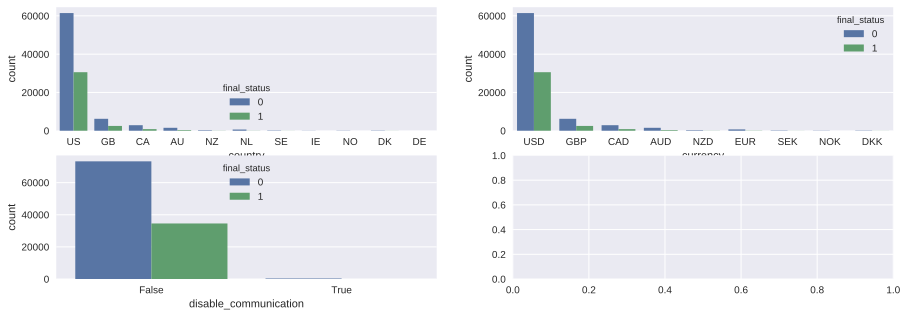

In [10]:
# train.goal.hist(figsize=(12, 4))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
sns.countplot(data=train,hue='final_status',x='country',ax=axes[0][0])
sns.countplot(data=train,hue='final_status',x='currency',ax=axes[0][1])
sns.countplot(data=train,hue='final_status',x='disable_communication',ax=axes[1][0])
# sns.countplot(data=train,hue='final_status',x='goal',ax=axes[1][1])

AS we can see most of the entries are from <b>country US,currency GBP and when disable_communication is false</b>t
But still most of them dont get funded.
There are less examples of funded_project.

In [11]:
# sns.boxplot(train.goal.astype('int64'))
goal_asint=train.goal.astype('int64')
goal_asint.describe()

count    1.081210e+05
mean     3.671792e+04
std      9.719342e+05
min      0.000000e+00
25%      2.000000e+03
50%      5.000000e+03
75%      1.300000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [12]:
#plots,transforms,various models,mlxtend,output,conclusion.

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.country=le.fit_transform(train.country)
train.currency=le.fit_transform(train.currency)

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y=train['final_status']

/home/ketul/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
x=train[['goal','disable_communication','country','currency']]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [16]:
model = XGBClassifier(base_score=0.30,n_estimators=700,nthread=2,max_depth=5)
model.fit(X_train, y_train)# make predictions for test data
y_pred = model.predict(X_test)

In [17]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.01%
